# 4 Point statistics analysis script 

The Aim of this script is to call in the statistics analysis that has been performed on the 4 point ODMR data in which the photon counting stats were kept constant for all the measurements performed (within a bit). 

In [1]:
import numpy as np 
import pandas as pd 
import scipy.optimize as opt
import matplotlib.pyplot as plot 

In [2]:
def import_data(file_location):
    '''Read the data from the .dat file into a pandas array'''
    
    data = pd.read_table(file_location)
    
    return(data)

In [3]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [4]:
def quadratic_equation(x, A, B, C):
    '''The formula for the quadraic equation'''
    
    y = A*np.power(x,2) + B*x + C
    return(y)

In [5]:
# Set the date, folder location and file name(s) that we want to pull data in from. 

date = '20211126'

folder_path = 'H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\' + date + '\\'
file_name = '20211126_Point_repeats_statistics_measurement_for_I_' 

set_plot_params()

# Create the variables that will be needed in the following analysis. 
repeats = np.zeros([13, 4])
dwell_time = np.zeros([13, 4])
total_counts = np.zeros([13, 4])
counts_per_measurement = np.zeros([13, 4])
std_norm_counts = np.zeros([13, 4])
std_error_norm_counts = np.zeros([13, 4])
accuracy_of_measurement = np.zeros([13, 4])

# pull in the data we want from the datasets. 
for i in range(4): 
    # Import the data into a pandas array 
    data = import_data(folder_path + file_name + str(i+1) + '.dat')
    
    # Put all the important data into its own variable. 
    # Sorted by [dataset, four point frequnecy]
    repeats[:, i] = data['Number of Repeats']
    dwell_time[:, i] = data['Dwell time (ms)']
    total_counts[:, i] = data['Total Counts recorded']
    counts_per_measurement[:, i] = data['Mean counts per single point (N)']
    std_norm_counts[:, i] = data['Standard Deviation of n']
    std_error_norm_counts[:, i] = data['Standard Error of n']
    accuracy_of_measurement[:, i] = data['Accuracy of measurement |I_CW - I_4point|']

In [6]:
mean_std = np.mean(std_norm_counts, axis = 1)

coeffs, confidence = opt.curve_fit(quadratic_equation, repeats[:,0], mean_std)
x = np.linspace(0,10000, 1000)
y = quadratic_equation(x, coeffs[0], coeffs[1], coeffs[2])

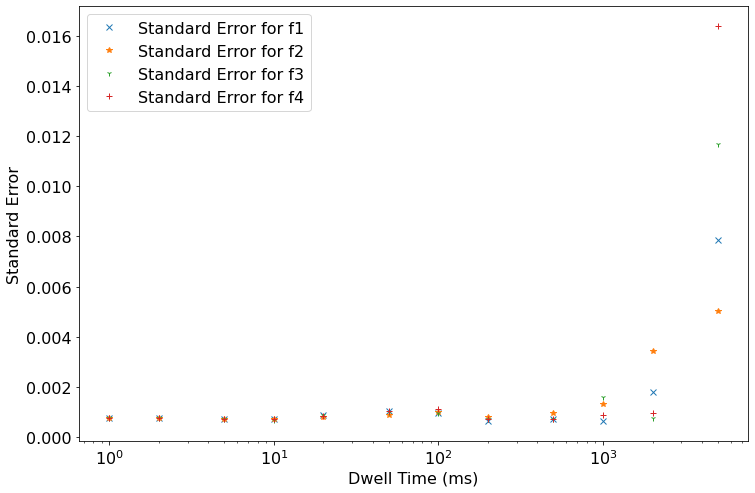

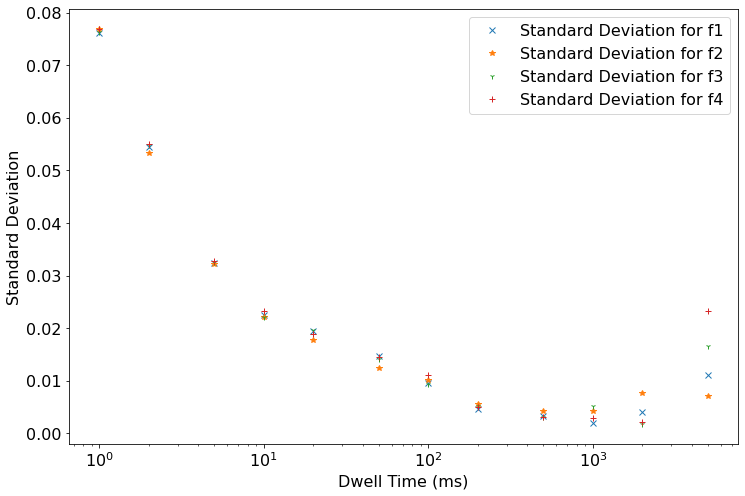

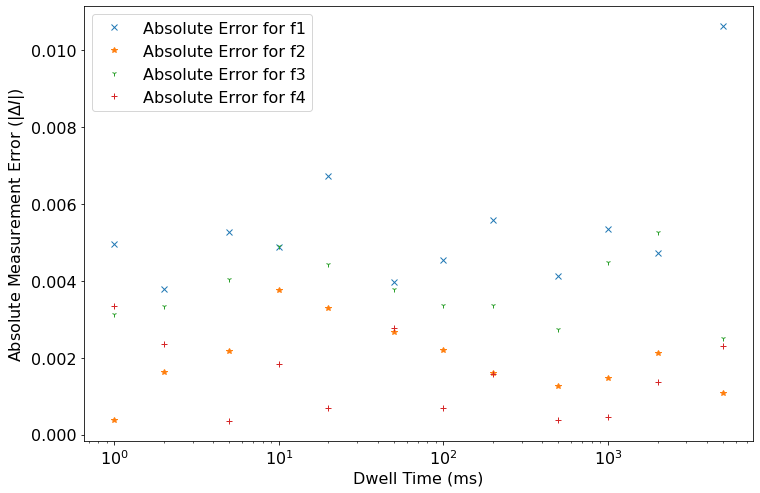

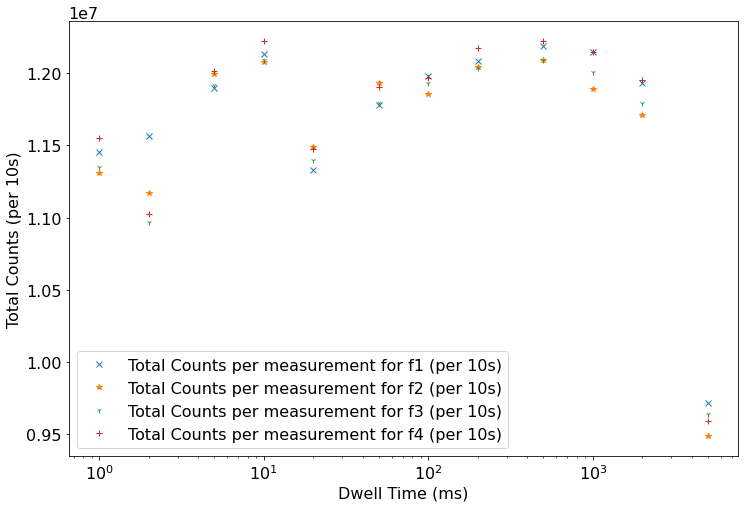

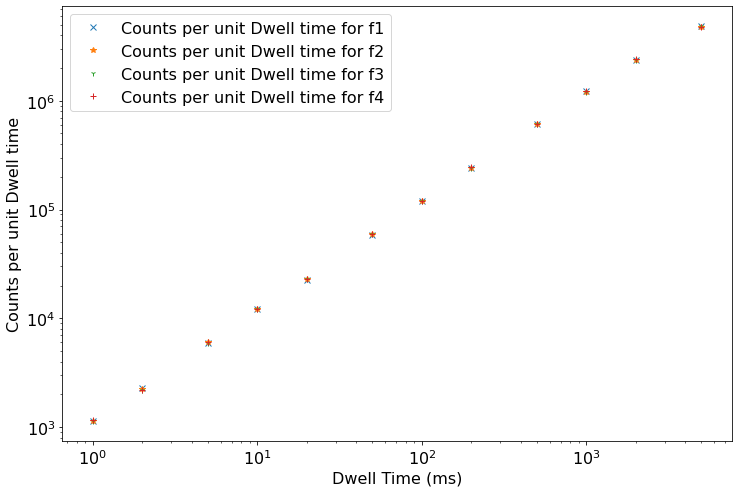

In [13]:
fig, ax = plot.subplots()
fig1, ax1 = plot.subplots()
fig2, ax2 = plot.subplots()
fig3, ax3 = plot.subplots()
fig4, ax4 = plot.subplots()


markers = ['x', '*', '1', '+']

for i in range (len(repeats[0,:])):
    ax.semilogx(dwell_time[1:len(dwell_time),i], std_error_norm_counts[1:len(dwell_time),i], marker = markers[i], 
               linestyle = '', label = 'Standard Error for f' + str(i+1))
    ax1.semilogx(dwell_time[1:len(dwell_time),i], std_norm_counts[1:len(dwell_time),i], marker = markers[i], 
               linestyle = '', label = 'Standard Deviation for f' + str(i+1))
    ax2.semilogx(dwell_time[1:len(dwell_time),i], accuracy_of_measurement[1:len(dwell_time),i], marker = markers[i], 
               linestyle = '', label = 'Absolute Error for f' + str(i+1))
    ax3.semilogx(dwell_time[1:len(dwell_time),i], total_counts[1:len(dwell_time),i], marker = markers[i], 
               linestyle = '', label = 'Total Counts per measurement for f' + str(i+1) + ' (per 10s)')
    ax4.loglog(dwell_time[1:len(dwell_time),i], counts_per_measurement[1:len(dwell_time),i], marker = markers[i], 
               linestyle = '', label = 'Counts per unit Dwell time for f' + str(i+1))
    
    
#ax1.plot(x, y)
    
ax.set_xlabel( 'Dwell Time (ms)')
ax1.set_xlabel('Dwell Time (ms)')
ax2.set_xlabel('Dwell Time (ms)')
ax3.set_xlabel('Dwell Time (ms)')
ax4.set_xlabel('Dwell Time (ms)')

ax.set_ylabel('Standard Error')
ax1.set_ylabel('Standard Deviation')
ax2.set_ylabel(r'Absolute Measurement Error $(|\Delta I|)$')
ax3.set_ylabel('Total Counts (per 10s)')
ax4.set_ylabel('Counts per unit Dwell time')

ax.legend()
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

In [14]:
fig.savefig(folder_path + date + '_Standard_Error_vs_repeats.pdf')
fig1.savefig(folder_path + date + '_Standard_deviation_vs_repeats.pdf')
fig2.savefig(folder_path + date + '_Accuracy_vs_repeats.pdf')
fig3.savefig(folder_path + date + '_Total_recorded_counts_vs_repeats.pdf')
fig4.savefig(folder_path + date + '_Counts_per_dwell_time_vs_repeats.pdf')

In [52]:
print(std_error_norm_counts[12,:])
print(accuracy_of_measurement[12,:])

[0.00076161 0.00076795 0.00076339 0.00076888]
[0.0049582  0.00037321 0.00313496 0.00333398]


In [62]:
m = 7.9
c = -9.4
delta_f = (0.00076)/(m)

print(str(np.round(delta_f, 6)*10**6)+ ' kHz')

96.0 kHz


In [64]:
(96/75)*np.sqrt(2*40)

11.448668044798923